In [20]:
import pandas as pd

data = pd.read_csv("houses_to_rent_v2.csv")
df = pd.DataFrame(data)

#print(data.head())

#How many buldings are in each city?

print(df['city'].value_counts())


São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64


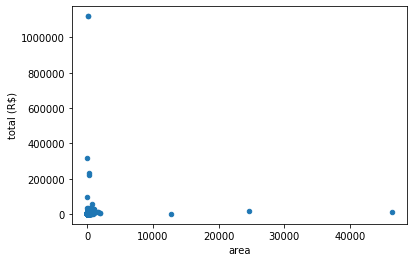

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

#scatter plot price and area of all buildings 

data = pd.read_csv("houses_to_rent_v2.csv")
df = pd.DataFrame(data)

df.plot.scatter(x = 'area', y = 'total (R$)')

plt.show()


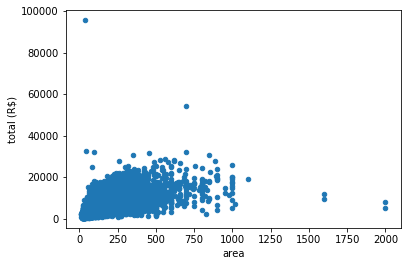

Number of buildings in the DataBase: 10692
Number of buildings in the cropped dataframe: 10684
% of original buildings belonging to new_df dataframe = 99.92517770295548


In [21]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

#scatter plot price and area of all buildings
#and let's get rid of buldings that cost more than 100,000 and with area bigger than 10,000

data = pd.read_csv("houses_to_rent_v2.csv")
df = pd.DataFrame(data)

new_df = df.loc[(df['area'] < 10000) & (df['total (R$)']< 100000)]
new_df.plot.scatter(x = 'area', y = 'total (R$)')

plt.show()
#df.shape[0] return nbr of rows, df.shape[1] returns nbr of columns
print("Number of buildings in the DataBase: " + str(df.shape[0])) #138 996
print("Number of buildings in the cropped dataframe: " + str(new_df.shape[0])) # 138 892
print("% of original buildings belonging to new_df dataframe = " + str((new_df.shape[0] / df.shape[0])*100))
#vast majority of buildings belong to new_df (99,925%) 

Coefficients: [22.36921866]
MSE: 10321048.59
Coefficient of determination: 0.45


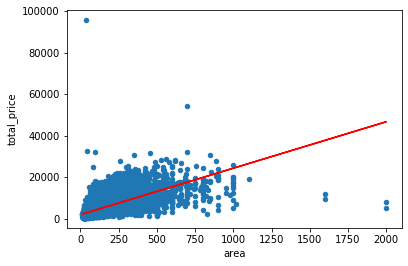

In [69]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("houses_to_rent_v2.csv")
df = pd.DataFrame(data)
df['total_price'] = df['total (R$)']

new_df = df.loc[(df['area'] < 10000) & (df['total_price']< 100000)]
new_df.plot.scatter(x = 'area', y = 'total_price')


#simple regression model
model = LinearRegression()

x = new_df.area.values.reshape(-1,1)[:]
x_train = new_df.area.values.reshape(-1,1)[:-500]
x_test = new_df.area.values.reshape(-1,1)[-2000:]

y_train = new_df.total_price.values.reshape(-1)[:-500]
y_test = new_df.total_price.values.reshape(-1)[-2000:]

reg = model.fit(x_train,y_train)

y_pred = model.predict(x_test)

plt.plot(x_test, y_pred, c='red')

#coeficcients
print("Coefficients: " + str(model.coef_))
#MSE
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

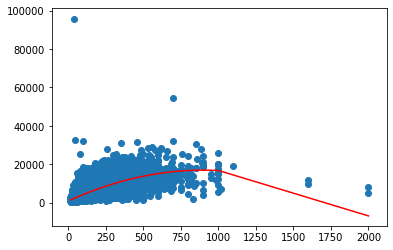

Order of polynomial: 2
Coefficients: [ 3.56077887e+01 -1.97520289e-02]
MSE: 9093658.11
Coefficient of determination: 0.52


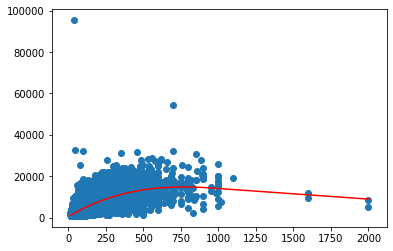

Order of polynomial: 3
Coefficients: [ 4.32943813e+01 -3.98807869e-02  1.01760414e-05]
MSE: 8928219.96
Coefficient of determination: 0.53


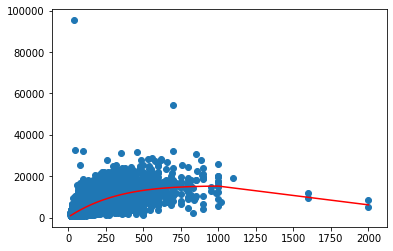

Order of polynomial: 4
Coefficients: [ 4.76606912e+01 -5.86595430e-02  3.37748213e-05 -7.81157626e-09]
MSE: 8890173.75
Coefficient of determination: 0.53


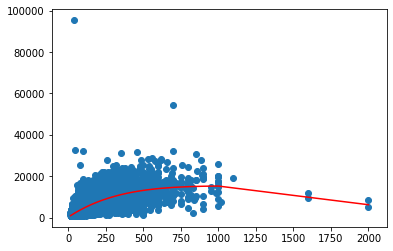

Order of polynomial: 5
Coefficients: [ 4.78722601e+01 -5.99090725e-02  3.63540275e-05 -9.84209349e-09
  5.15652406e-13]
MSE: 8889459.26
Coefficient of determination: 0.53


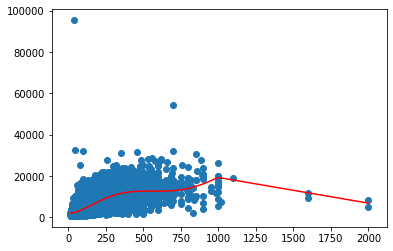

Order of polynomial: 6
Coefficients: [ 1.93221616e-03  2.83385670e-01 -9.24577274e-04  1.17913144e-06
 -6.47554988e-10  1.26931690e-13]
MSE: 8920254.97
Coefficient of determination: 0.53


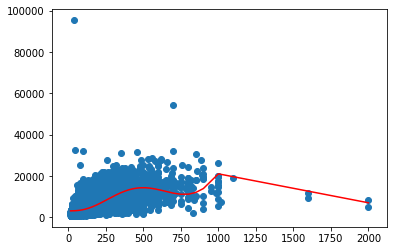

Order of polynomial: 7
Coefficients: [ 2.19836634e-08  6.90259583e-06  8.66800559e-04 -2.97328464e-06
  3.74204344e-09 -1.99930679e-12  3.81658388e-16]
MSE: 10000021.73
Coefficient of determination: 0.47


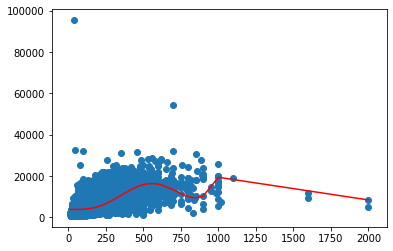

Order of polynomial: 8
Coefficients: [ 1.23614930e-13 -7.11980729e-08  1.14337146e-08  1.89778423e-06
 -6.41887734e-09  7.87900456e-12 -4.11272081e-15  7.70375121e-19]
MSE: 11711800.56
Coefficient of determination: 0.38


In [93]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


data = pd.read_csv("houses_to_rent_v2.csv")
df = pd.DataFrame(data)
df['total_price'] = df['total (R$)']

new_df = df.loc[(df['area'] < 10000) & (df['total_price']< 100000)]

for order in range(2,9):
    #training and test values
    x = new_df.area.values.reshape(-1,1)[:]
    x_train = new_df.area.values.reshape(-1,1)[:-500]
    x_test = new_df.area.values.reshape(-1,1)[-2000:]

    y_train = new_df.total_price.values.reshape(-1)[:-500]
    y_test = new_df.total_price.values.reshape(-1)[-2000:]
    
    #polynomial regression model
    model = LinearRegression()
    polyFeat = PolynomialFeatures(order, include_bias = False)
    x_poly = polyFeat.fit_transform(x_train)
    x_polyTest = polyFeat.fit_transform(x_test)

    reg = model.fit(x_poly,y_train)

    y_pred = model.predict(x_polyTest)
    
    #sorting data in order to plot them correctly
    plottingDataFrame = pd.DataFrame({'X':x_test.ravel(), 'y':y_pred.ravel()}) #ravel() flattens multi dim lists
    plottingDataFrame = plottingDataFrame.sort_values('X')
    
    #scatter plot - all house data
    #linear plot - model prediction
    plt.plot(plottingDataFrame['X'], plottingDataFrame['y'], c='red')
    plt.scatter(x = new_df['area'], y = new_df['total_price'])
    plt.show()

    #coeficcients
    print("Order of polynomial: " + str(order))
    print("Coefficients: " + str(model.coef_))
    #MSE
    print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
    print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Best fit:
Order of polynomial: 5
Coefficients: [ 4.78722601e+01 -5.99090725e-02  3.63540275e-05 -9.84209349e-09
  5.15652406e-13]
MSE: 8889459.26
Coefficient of determination: 0.53
    
Possible overfitting?